# Backward error anaylsis for the Symplectic Euler method

In [16]:
using Plots
using LinearAlgebra
using ForwardDiff: gradient, derivative, hessian
include("IntegratorTools.jl")

Integrator (generic function with 1 method)

## Define Hamiltonian system

In [2]:
H(q,p) = 1/2*p^2 - 1/2*sin(q)
H(z) = H(z[1],z[2])

H (generic function with 2 methods)

In [3]:
Jinv = [0 1; -1 0];
XH(z) = Jinv*gradient(H,z)
Hq(q,p) = derivative(q->H(q,p),q)
Hp(q,p) = derivative(p->H(q,p),p)

Hp (generic function with 1 method)

## Long term integration - Symplectic Euler method

In [18]:
z0 = [0.5,0.] # inital point
h = 0.1;      # time step

In [8]:
stepsLong=Int(1e5) #1e7
ZSympEulerLong=Integrator(z->SympEuler(h,z),z0,stepsLong);
ZMidPointLong=Integrator(z->MidPoint(h,z),z0,stepsLong);
ttLong = range(0,stepsLong*h,stepsLong+1);

In [9]:
energySympELLong = mapslices(H,ZSympEulerLong,dims=1)';
energyMPLong = mapslices(H,ZMidPointLong,dims=1)';

## Backward Error Analysis -- modified Hamiltonian for Symplectic Euler

In [10]:
# modified Hamiltonian Symplectic Euler method
function modHSymplEl(h,z)

    hh = H(z)
    gradH=gradient(H,z)
    hessH=hessian(H,z)
    hp=gradH[2]
    hq=gradH[1]
    
    mod1 = hh + h/2*hp*hq
    mod2 = mod1 + h^2/12*(hessH[2,2]*hq^2 + hessH[1,1]*hp^2 + 4*hessH[1,2]*hq*hp)

    return [hh, mod1, mod2]
end 

modHSymplEl (generic function with 1 method)

In [11]:
# energy conservation along truncated modified Hamiltonians
modHSymplElVals = mapslices(z->modHSymplEl(h,z),ZSympEulerLong,dims=1);
modHSymplElOsc = modHSymplElVals .- modHSymplElVals[:,1];

In [19]:
sparseSkip=20;  # plot only every nth step -- plotting performance

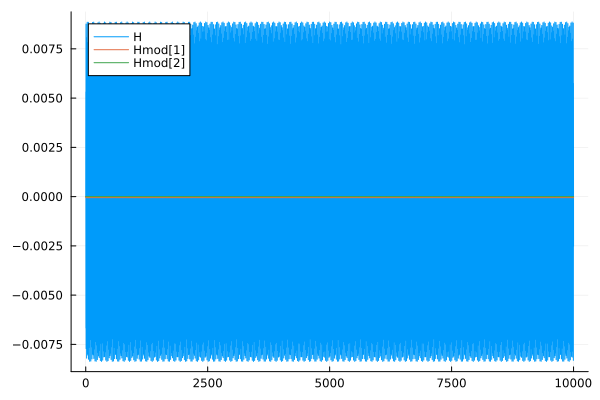

In [13]:
plot(ttLong[1:sparseSkip:end],modHSymplElOsc[1,1:sparseSkip:end],label="H")
plot!(ttLong[1:sparseSkip:end],modHSymplElOsc[2,1:sparseSkip:end],label="Hmod[1]")
plot!(ttLong[1:sparseSkip:end],modHSymplElOsc[3,1:sparseSkip:end],label="Hmod[2]")

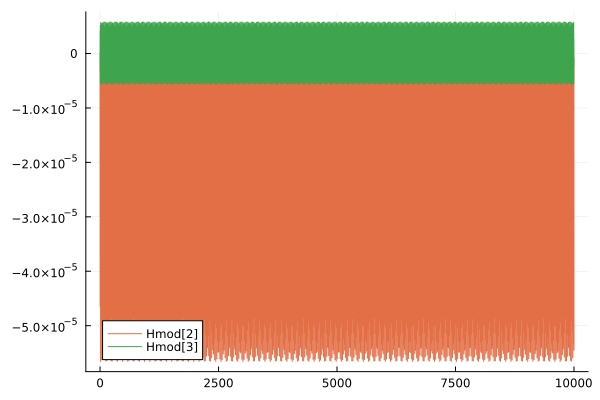

In [14]:
plot(ttLong[1:sparseSkip:end],modHSymplElOsc[2,1:sparseSkip:end], color=:2,label="Hmod[2]")
plot!(ttLong[1:sparseSkip:end],modHSymplElOsc[3,1:sparseSkip:end], color=:3,label="Hmod[3]")

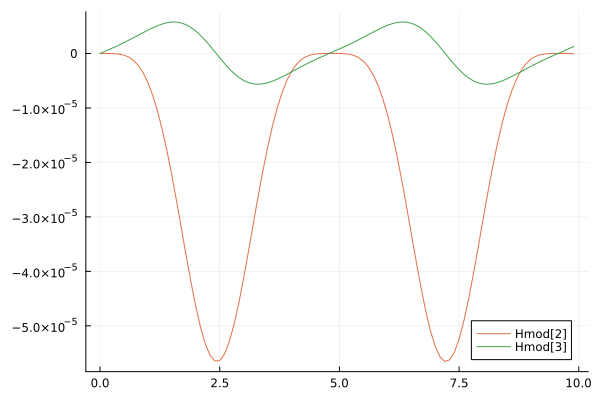

In [15]:
plot(ttLong[1:100],modHSymplElOsc[2,1:100], color=:2,label="Hmod[2]")
plot!(ttLong[1:100],modHSymplElOsc[3,1:100], color=:3,label="Hmod[3]")